<a href="https://colab.research.google.com/github/rhodes-byu/cs-stat-180/blob/main/notebooks/03b-pandas-aggregation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><p><b>After clicking the "Open in Colab" link, copy the notebook to your own Google Drive before getting started, or it will not save your work</b></p>

In [1]:
# Import Pandas library
import pandas as pd
import numpy as np

In [2]:
## Iris data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(url, names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'class'])

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.rename(columns={'class': 'species'}, inplace=True)

## Using Apply

In [5]:
iris['sepal_length'].apply(np.log)

0      1.629241
1      1.589235
2      1.547563
3      1.526056
4      1.609438
         ...   
145    1.902108
146    1.840550
147    1.871802
148    1.824549
149    1.774952
Name: sepal_length, Length: 150, dtype: float64

In [6]:
# What happened?
iris['sepal_length'].apply(np.mean)

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

In [7]:
iris.iloc[:, 0:4].apply(np.mean)

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64

In [8]:
iris['species'].apply(lambda x: x.title())

0         Iris-Setosa
1         Iris-Setosa
2         Iris-Setosa
3         Iris-Setosa
4         Iris-Setosa
            ...      
145    Iris-Virginica
146    Iris-Virginica
147    Iris-Virginica
148    Iris-Virginica
149    Iris-Virginica
Name: species, Length: 150, dtype: object

In [9]:
iris['species'].str.lower()

0         iris-setosa
1         iris-setosa
2         iris-setosa
3         iris-setosa
4         iris-setosa
            ...      
145    iris-virginica
146    iris-virginica
147    iris-virginica
148    iris-virginica
149    iris-virginica
Name: species, Length: 150, dtype: object

In [10]:
def zero_one_scale(x):
    return (x - np.min(x)) / (np.max(x)- np.min(x))

In [11]:
## Why does this not work?
iris['sepal_length'].apply(zero_one_scale)

C:\Users\abwil\AppData\Local\Temp\ipykernel_45080\1522982835.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return (x - np.min(x)) / (np.max(x)- np.min(x))


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: sepal_length, Length: 150, dtype: float64

In [12]:
## Why does this not work?
iris['petal_length'].apply(lambda x: zero_one_scale(x))

C:\Users\abwil\AppData\Local\Temp\ipykernel_45080\1522982835.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return (x - np.min(x)) / (np.max(x)- np.min(x))


0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
145   NaN
146   NaN
147   NaN
148   NaN
149   NaN
Name: petal_length, Length: 150, dtype: float64

In [13]:
zero_one_scale(iris.petal_length)

0      0.067797
1      0.067797
2      0.050847
3      0.084746
4      0.067797
         ...   
145    0.711864
146    0.677966
147    0.711864
148    0.745763
149    0.694915
Name: petal_length, Length: 150, dtype: float64

## Groupby, Aggregation

### Use Titanic data example here

In [14]:
## Titanic data
# from sklearn.datasets import fetch_openml
# dat = fetch_openml(data_id=40945, parser = 'auto')
# titanic = dat.frame

titanic = pd.read_csv('https://raw.githubusercontent.com/rhodes-byu/cs-stat-180/refs/heads/main/data/titanic.csv')

In [15]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [16]:
titanic.drop('name', axis = 1, inplace = True)

In [17]:
# Average age by sex
age_by_sex = titanic.groupby('sex')['age'].mean()

# Display the aggregated data
print("Age By Sex:\n", age_by_sex)


Age By Sex:
 sex
female    28.687071
male      30.585233
Name: age, dtype: float64


In [18]:
# Multiple Grouping Categories
titanic.groupby(['sex', 'pclass'])['age'].mean()

sex     pclass
female  1         37.037594
        2         27.499191
        3         22.185307
male    1         41.029250
        2         30.815401
        3         25.962273
Name: age, dtype: float64

In [19]:
# Multiple Target Variables
titanic.groupby(['sex'])[['age', 'fare']].mean()

,age,fare
sex,,
female,28.687071,46.198097
male,30.585233,26.154601


In [20]:
# Multiple Aggregations
titanic.groupby('sex')['age'].agg(['mean', 'max', 'min', 'sum']).round()


,mean,max,min,sum
sex,,,,
female,29.0,76.0,0.0,11131.0
male,31.0,80.0,0.0,20125.0


In [21]:
# Define a custom aggregation function
def range(series):
    return series.max() - series.min()

titanic.groupby('sex')['fare'].agg(range)


sex
female    505.5792
male      512.3292
Name: fare, dtype: float64

In [22]:
# Group data by 'Region' and apply named aggregations to multiple columns
region_summary = titanic.groupby('home.dest').agg(
    total_fare=('fare', 'sum'),
    agerage_fare=('fare', 'mean'),
    average_age=('age', 'mean')
)

# Display the summary for each region
print("Region-wise Summary:\n", region_summary)


Region-wise Summary:
                                      total_fare  agerage_fare  average_age
home.dest                                                                 
?Havana, Cuba                           27.7208       27.7208    28.500000
Aberdeen / Portland, OR                 31.5000       15.7500    26.000000
Albany, NY                              28.5375       28.5375    31.000000
Altdorf, Switzerland                    35.6000       17.8000    21.500000
Amenia, ND                             122.3500       61.1750    46.500000
...                                         ...           ...          ...
Worcester, England                      26.0000       26.0000    19.000000
Worcester, MA                           65.0000       32.5000    37.000000
Yoevil, England / Cottage Grove, OR     13.5000       13.5000    26.000000
Youngstown, OH                         659.4668      164.8667    40.750000
Zurich, Switzerland                    207.9000       69.3000    43.333333

[3

### Mini exercises — Iris dataset (8–10 min)
1. Show the **shape** of the frame and the **unique classes**.
2. Compute the **mean petal length** by class.
3. Filter rows where `sepal_length > 6.0` and `petal_width < 1.5`.
4. Create a quick scatter plot of `sepal_length` vs `sepal_width`.

<details>
<summary>Hints</summary>

- Use `.shape`, `.unique()`, and `groupby('class')`.
- For filtering, combine conditions with `&` and wrap each in parentheses.
- For plotting, try `df.plot.scatter(x='sepal_length', y='sepal_width')`.
</details>

(150, 5) ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: petal_length, dtype: float64
     sepal_length  sepal_width  petal_length  petal_width          species
50            7.0          3.2           4.7          1.4  Iris-versicolor
58            6.6          2.9           4.6          1.3  Iris-versicolor
63            6.1          2.9           4.7          1.4  Iris-versicolor
65            6.7          3.1           4.4          1.4  Iris-versicolor
71            6.1          2.8           4.0          1.3  Iris-versicolor
73            6.1          2.8           4.7          1.2  Iris-versicolor
74            6.4          2.9           4.3          1.3  Iris-versicolor
75            6.6          3.0           4.4          1.4  Iris-versicolor
76            6.8          2.8           4.8          1.4  Iris-versicolor
87            6.3          2.3           4.4          1.3  Iris-versicol

Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

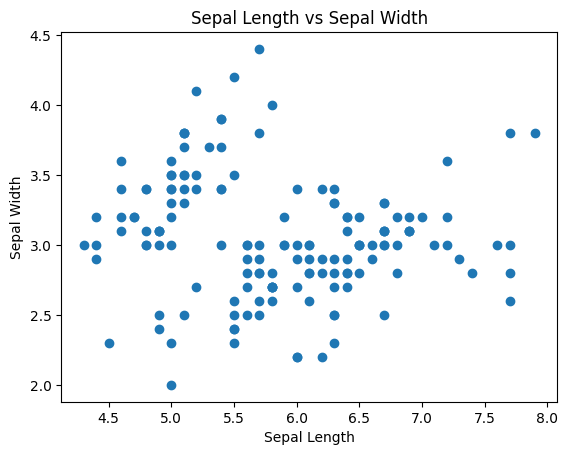

In [71]:
# TODO: Your turn — Iris dataset mini exercises

import matplotlib.pyplot as plt

# 1) Shape and unique classes
print(iris.shape, iris['species'].unique())

# 2) Mean petal length by class
print(iris.groupby('species')['petal_length'].mean())

# 3) Filtered subset
print(iris[(iris['sepal_length'] > 6.0) & (iris['petal_width'] < 1.5)])

# 4) Quick scatter plot (may show inline depending on environment)
plt.scatter(iris['sepal_length'], iris['sepal_width'])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Length vs Sepal Width')

In [24]:
#----------------------------------------------------------------------#

### Combining DataFrames

In [25]:
import pandas as pd

# Create two DataFrames
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                    'B': ['B0', 'B1', 'B2']})

df2 = pd.DataFrame({'A': ['A3', 'A4', 'A5'],
                    'B': ['B3', 'B4', 'B5']})




In [26]:
df1

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


In [27]:
df2

,A,B
0,A3,B3
1,A4,B4
2,A5,B5


In [28]:
# Concatenate DataFrames vertically
result = pd.concat([df1, df2], axis=0)

# Display the concatenated DataFrame
print("Concatenated DataFrame:\n", result)

Concatenated DataFrame:
     A   B
0  A0  B0
1  A1  B1
2  A2  B2
0  A3  B3
1  A4  B4
2  A5  B5


In [29]:
# Create two DataFrames with a common column 'key'
left = pd.DataFrame({'key': ['A', 'B', 'C'],
                     'value_left': [1, 2, 3]})

right = pd.DataFrame({'key': ['B', 'C', 'D'],
                      'value_right': [4, 5, 6]})


In [30]:
left

,key,value_left
0,A,1
1,B,2
2,C,3


In [31]:
right

,key,value_right
0,B,4
1,C,5
2,D,6


In [32]:
# Merge DataFrames based on the 'key' column
merged_inner = pd.merge(left, right, on='key', how='inner')

# Display the merged DataFrame
print("Inner Merge:\n", merged_inner)

Inner Merge:
   key  value_left  value_right
0   B           2            4
1   C           3            5


In [33]:
merged_outer = pd.merge(left, right, on='key', how='outer')
print("Outer Merge:\n", merged_outer)

Outer Merge:
   key  value_left  value_right
0   A         1.0          NaN
1   B         2.0          4.0
2   C         3.0          5.0
3   D         NaN          6.0


In [34]:
# Create a DataFrame with wide-format data
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Math_Score': [90, 85, 78],
        'Science_Score': [88, 92, 80]}

df = pd.DataFrame(data)

print(df)

      Name  Math_Score  Science_Score
0    Alice          90             88
1      Bob          85             92
2  Charlie          78             80


### Reshaping DataFrames

In [35]:
# Melt the DataFrame to long-format
melted_df = pd.melt(df, id_vars=['Name'], var_name='Subject', value_name='Score')

# Display the melted DataFrame
print("Melted DataFrame:\n", melted_df)

Melted DataFrame:
       Name        Subject  Score
0    Alice     Math_Score     90
1      Bob     Math_Score     85
2  Charlie     Math_Score     78
3    Alice  Science_Score     88
4      Bob  Science_Score     92
5  Charlie  Science_Score     80


In [36]:

# Define a mapping function to assign letter grades
def assign_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    else:
        return 'F'

# Apply the mapping function to create a new column 'Grade'
melted_df['Grade'] = melted_df['Score'].map(assign_grade)

# Display the DataFrame with letter grades
print(melted_df)


      Name        Subject  Score Grade
0    Alice     Math_Score     90     A
1      Bob     Math_Score     85     B
2  Charlie     Math_Score     78     C
3    Alice  Science_Score     88     B
4      Bob  Science_Score     92     A
5  Charlie  Science_Score     80     B


In [37]:
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Scott', 'Liz'],
        'Age': [28, 45, 60, 34, 50, 40]}

df = pd.DataFrame(data)

# Define bin edges and labels for age groups
bin_edges = [0, 30, 40, 50, 100]
bin_labels = ['0-30', '31-40', '41-50', '51+']

# Use the `cut` function to create a new column 'AgeGroup'
df['AgeGroup'] = pd.cut(df['Age'], bins=bin_edges, labels=bin_labels)

# Display the DataFrame with age groups
print(df)


      Name  Age AgeGroup
0    Alice   28     0-30
1      Bob   45    41-50
2  Charlie   60      51+
3    David   34    31-40
4    Scott   50    41-50
5      Liz   40    31-40


## Getting multiple pieces of information from a single column

### Unpacking

Many times, a single column will contain multiple pieces of information.  Learning how to extract this information is extremely important and is a great skill to have.

If it is possibe to somehow separate or split the elements in the column, this is a much easier and more effecive way of extracting information than simply extracting info based on slicing.

For example, suppose we have a list of cities with the state.  We want to separate the city and the state into individual columns.  

In [38]:
cities = pd.Series(['Provo, Utah', 'Omaha, Nebraska', 'Fremont, Ohio','Green River, Wyoming', 'Durham, North Carolina' ])
cities

0               Provo, Utah
1           Omaha, Nebraska
2             Fremont, Ohio
3      Green River, Wyoming
4    Durham, North Carolina
dtype: object

In [39]:
for name in cities:
    print(name)

Provo, Utah
Omaha, Nebraska
Fremont, Ohio
Green River, Wyoming
Durham, North Carolina


This looks like a hard problem because there are different lengths for each city and state name.  Some of the city names and state names even have spaces.  We recognize that there is a common format.  The city names are all separated from the state name by a comma.  We can use the string method ``.split("character")`` to separate the words in a string based on ``"character"``.  

By default, ``.split()`` will separate on spaces.

In [40]:
s = 'Provo, Utah'
s.split()

['Provo,', 'Utah']

In [41]:
s.split(",")

['Provo', ' Utah']

In [42]:
cities.apply(lambda x: x.split(","))

0               [Provo,  Utah]
1           [Omaha,  Nebraska]
2             [Fremont,  Ohio]
3      [Green River,  Wyoming]
4    [Durham,  North Carolina]
dtype: object

Or we could use  ``.str`` with ``.split``

In [43]:
cities.str.split(",")

0               [Provo,  Utah]
1           [Omaha,  Nebraska]
2             [Fremont,  Ohio]
3      [Green River,  Wyoming]
4    [Durham,  North Carolina]
dtype: object

Now we have a list of lists.  Next we need the get the information out.  We know that our Series had only one comma and when we split on the comma (using ``.split(",")``) everything before the comma is the first item in the list and everything after the comma is the second item in the list.  
In our example, the first item is the city name and the second item is the state name.

Here are a couple of ways to extract the data that was split.

**First using a ``for`` loop:**

Notice that the state variable has white space, so we can strip that inside our for loop:

In [44]:
# for loop
cities_split = cities.str.split(",")

state = []
city = []
for item in cities_split:
    city.append(item[0].strip())
    state.append(item[1].strip())

In [45]:
cities_split

0               [Provo,  Utah]
1           [Omaha,  Nebraska]
2             [Fremont,  Ohio]
3      [Green River,  Wyoming]
4    [Durham,  North Carolina]
dtype: object

In [46]:
state

['Utah', 'Nebraska', 'Ohio', 'Wyoming', 'North Carolina']

In [47]:
city

['Provo', 'Omaha', 'Fremont', 'Green River', 'Durham']

**Second using ``.apply`` and ``lambda`` functions:**

In [48]:
# apply with lambda function
city = cities_split.apply(lambda x:x[0].strip())
state = cities_split.apply(lambda x:x[1].strip())

In [49]:
state

0              Utah
1          Nebraska
2              Ohio
3           Wyoming
4    North Carolina
dtype: object

In [50]:
city

0          Provo
1          Omaha
2        Fremont
3    Green River
4         Durham
dtype: object

**Another Example**

Here, suppose I have times in the format ``hour:minute:second``.  I want to make a variable that combines these into just one time.  Since the lowest resolution is seconds, I will make a variable for "seconds".

In [51]:
times = pd.Series(['01:34:07','00:35:12','00:00:16','03:59:00'])

In [52]:
time_list = times.str.split(":")
time_list

0    [01, 34, 07]
1    [00, 35, 12]
2    [00, 00, 16]
3    [03, 59, 00]
dtype: object

In [53]:
seconds = []
for time in time_list:
    temp = int(time[0])*60*60 + int(time[1])*60 + int(time[2])
    seconds.append(temp)


In [54]:
seconds

[5647, 2112, 16, 14340]